In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
data = pd.read_csv("500_Person_Gender_Height_Weight_Index.csv")
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [73]:
data.shape

(500, 4)

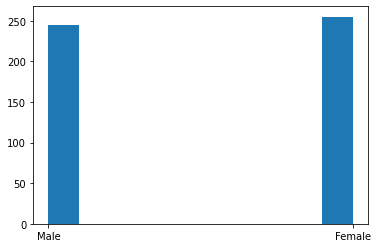

In [74]:
plt.hist(data.Gender);

In [75]:
data.Gender.unique()

In [100]:
X=data.drop(['Index'],axis=1)
X=pd.get_dummies(X)
Y=data['Index']

In [101]:
X

,Height,Weight,Gender_Female,Gender_Male
0,174,96,0,1
1,189,87,0,1
2,185,110,1,0
3,195,104,1,0
4,149,61,0,1
...,...,...,...,...
495,150,153,1,0
496,184,121,1,0
497,141,136,1,0
498,150,95,0,1


In [79]:
from sklearn.tree import DecisionTreeRegressor

In [81]:
regtree = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, max_depth=5, random_state=0)

In [82]:
regtree.fit(X,Y)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=30,
                      random_state=0)

In [102]:
preds = regtree.predict(X)

In [103]:
data["preds"] = preds

In [107]:
data[["preds", "Index"]]

,preds,Index
0,3.956522,4
1,2.736842,2
2,3.150000,4
3,3.150000,3
4,2.700000,3
...,...,...
495,5.000000,5
496,4.000000,4
497,5.000000,5
498,4.700000,5


In [116]:
data["tree_error"] = (data["preds"]-data["Index"])**2
sum(data["tree_error"])/len(data)

0.12328785494930344

## Random Forest

In [109]:
from sklearn.ensemble import RandomForestRegressor

In [110]:
forest = RandomForestRegressor(n_jobs=2, oob_score=True, n_estimators=10000)
forest.fit(X,Y)

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


RandomForestRegressor(n_estimators=10000, n_jobs=2, oob_score=True)

In [111]:
data["rforest_pred"]= forest.oob_prediction_
data[["rforest_pred", "Index"]]

,rforest_pred,Index
0,3.886598,4
1,2.855109,2
2,3.615322,4
3,2.993816,3
4,2.971231,3
...,...,...
495,5.000000,5
496,3.997030,4
497,5.000000,5
498,4.641012,5


In [112]:
data["rforest_error2"] = (data["rforest_pred"]-data["Index"])**2
sum(data["rforest_error2"])/len(data)

0.10650883453545407

In [113]:
forest.oob_score_

0.9418777260439019